In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [12]:
cora = pd.read_csv("https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/cora.cites", sep ="\t", header = None)
cora.columns = ["id1", "id2"]
cora.head()

id1      id2
0   35     1033
1   35   103482
2   35   103515
3   35  1050679
4   35  1103960

In [13]:

df = pd.read_csv("https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/cora.content", sep ="\t", header = None)
df= df.iloc[:,[0,1434]]
df.columns = ["node", "subject"]
df.head()

node                 subject
0    31336         Neural_Networks
1  1061127           Rule_Learning
2  1106406  Reinforcement_Learning
3    13195  Reinforcement_Learning
4    37879   Probabilistic_Methods

In [14]:
df.subject.value_counts()

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: subject, dtype: int64

In [15]:
#create a graph
G= nx.from_pandas_edgelist(cora, "id1", "id2")

In [16]:
def Graph_summary(graph):
  """ print different metrics for undirected graph
  """
  g_degree = dict(graph.degree)
  print("graph G is directed: {}".format(graph.is_directed()) )
  print("Number of nodes (V):{}".format(len(graph.nodes)))
  print("Number of edges (E):{}".format(len(graph.edges)))
  print("Maximum node degree:{}".format(np.max(list(g_degree.values()))))
  print("Minimum node degree:{}".format(np.min(list(g_degree.values()))))
  print("Average node degree:{:.3f}".format(np.mean(list(g_degree.values()))))
  print("Median node degree:{}".format(np.median(list(g_degree.values()))))
  print("Average clustering coefficient:{:.3f}".format(nx.average_clustering(graph)))
  print("Transivity:{:.3f}".format(nx.transitivity(graph)))
  print("Number of connected components:{:.3f}".format(nx.number_connected_components(graph)))
  G_comps = sorted(nx.connected_components(graph), key=len, reverse=True)
  Giant_comp = graph.subgraph(G_comps[0])
  print("Number of nodes and edges in largest component:{}, {}".format(len(Giant_comp.nodes), len(Giant_comp.edges)))

  try:
    print("Number of strongly connected components:{}".format(nx.number_strongly_connected_components(graph)))
    print("Number of weekly connected components:{}".format(nx.number_weekly_connected_components(graph)))
  except:
    pass
  try:
    print("Average distance:{:.3f}".format(nx.average_shortest_path_length(graph)))
    print("Diameter:{}".format(nx.diameter(graph)))
  except:
    pass
    paths = []
    for C in (G.subgraph(c).copy() for c in G_comps):
      paths.append(nx.average_shortest_path_length(C))
    print(print("average distance for the first components:{}".format(np.round(paths[:5],2))))

  return None

In [17]:
Graph_summary(G)


graph G is directed: False
Number of nodes (V):2708
Number of edges (E):5278
Maximum node degree:168
Minimum node degree:1
Average node degree:3.898
Median node degree:3.0
Average clustering coefficient:0.241
Transivity:0.093
Number of connected components:78.000
Number of nodes and edges in largest component:2485, 5069
average distance for the first components:[6.31 3.22 1.36 1.61 1.6 ]
None


In [18]:
pos = nx.spring_layout(G)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(G, pos, with_labels = False, node_size = 35)
plt.show()

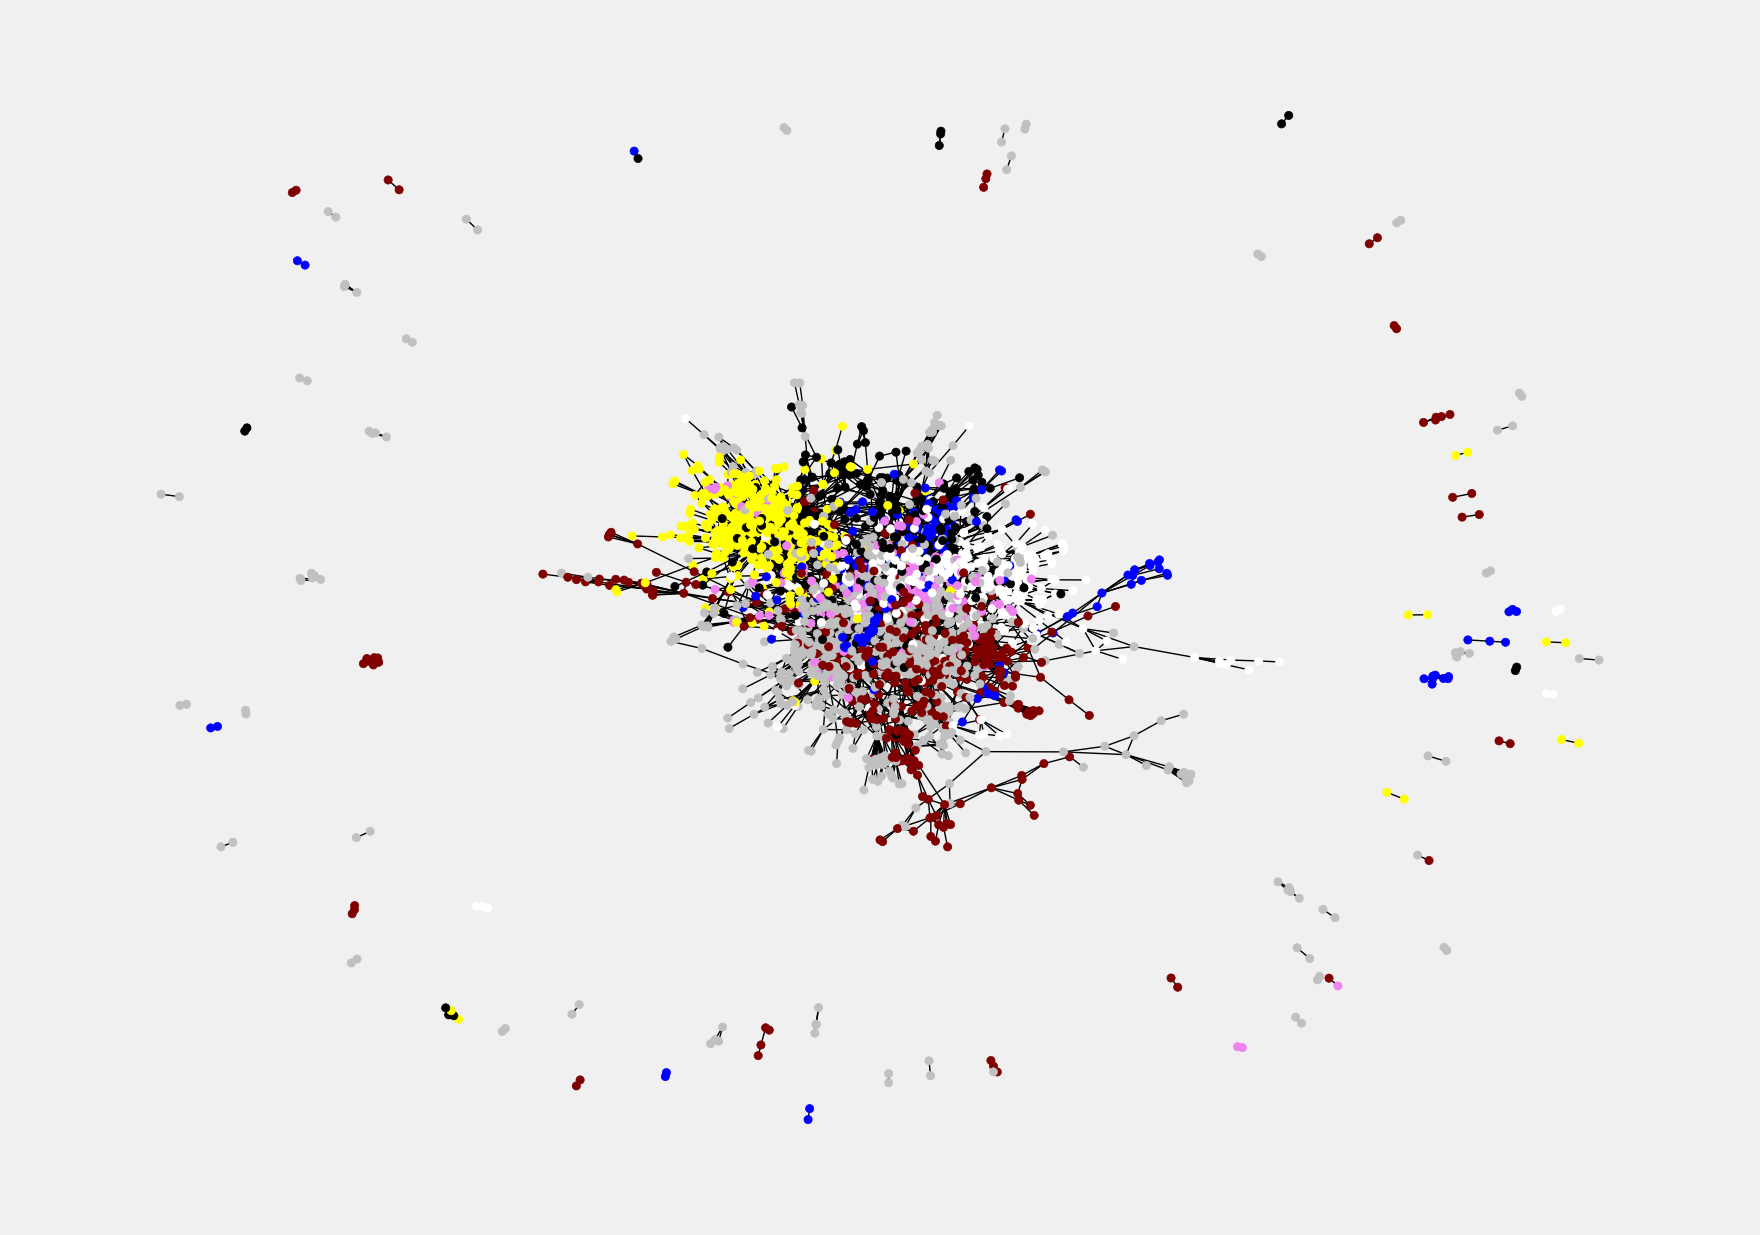

In [19]:
#coloring according to category
#setting an attribute to the node
cat = dict(zip(df.node, df.subject)) #we use a dictionary
nx.set_node_attributes(G, cat, "subject")
color_nodes = {"Neural_Networks": "silver", "Probabilistic_Methods": "maroon","Genetic_Algorithms": "green", "Rule_Learning": "blue",
               "Genetic_Algorithms": "yellow", "Theory": "white", "Case_Based": "black", "Reinforcement_Learning": "violet"}
#plotting
pos = nx.spring_layout(G)
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(G, pos, with_labels = False, node_size = 35,
                 node_color=[color_nodes[node[1]['subject']] #to colors
                             for node in G.nodes(data=True)])
plt.show()

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Calculate betweenness centrality and set it as node attributes
bb = nx.betweenness_centrality(G)
nx.set_node_attributes(G, bb, "betweness")

# Extract betweenness centrality values
values = np.array(list(nx.get_node_attributes(G, 'betweness').values()))

# Generate node positions (spring layout or your preferred layout)
pos = nx.spring_layout(G)

# Suppress warnings
warnings.filterwarnings('ignore')

# Set plot style and figure parameters
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')

# Define parameters for the plot
vmin = np.min(values)
vmax = np.max(values)
cmap = plt.cm.coolwarm

# Draw the graph edges
nx.draw_networkx_edges(G, pos)

# Draw the nodes using a scatter plot to create a mappable object for the colorbar
sc = plt.scatter(
    [pos[n][0] for n in G.nodes()],
    [pos[n][1] for n in G.nodes()],
    c=values, cmap=cmap, vmin=vmin, vmax=vmax, s=35
)

# Add the colorbar
plt.colorbar(sc)


plt.show()


In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Create a sample graph (replace this with your actual graph)
# G = your graph

# Calculate the degree of nodes
values = list(G.degree)
values = np.array(values)[:, 1]  # Extract degree values

# Apply log transformation (add 1 to avoid log(0) issues)
values = np.log2(values + 1)

# Get statistics
print(f"Max value: {np.max(values)}")
print(f"Mean value: {np.mean(values)}")
print(f"Std deviation: {np.std(values)}")

# Set the plot style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')

# Parameters for plotting
vmin = np.min(values)
vmax = np.max(values)
cmap = plt.cm.coolwarm

# Generate positions for nodes (use spring layout or your preferred layout)
pos = nx.spring_layout(G)

# Draw the graph edges
nx.draw_networkx_edges(G, pos)

# Draw the nodes using a scatter plot to create a mappable object for the colorbar
sc = plt.scatter(
    [pos[n][0] for n in G.nodes()],
    [pos[n][1] for n in G.nodes()],
    c=values, cmap=cmap, vmin=vmin, vmax=vmax, s=35
)

# Add the colorbar
plt.colorbar(sc)

# Show the plot
plt.show()


Max value: 7.400879436282184
Mean value: 2.0368080835463775
Std deviation: 0.7625620758430761


## python Igraph

In [ ]:

!pip install igraph
!sudo apt-get update  -y
!sudo apt-get install libcairo2-dev  -y
!sudo apt-get install pkg-config  -y
!pip install pycairo

In [20]:
from igraph import *
g = Graph.DataFrame(cora, directed=False)

In [21]:
g = Graph.from_networkx(G)
plot(g)

In [22]:
g.vs[1]

igraph.Vertex(<igraph.Graph object at 0x7fc676b63840>, 1, {'_nx_name': 1033, 'subject': 'Genetic_Algorithms'})

In [23]:
color_nodes = {"Neural_Networks": "silver", "Probabilistic_Methods": "maroon","Genetic_Algorithms": "green", "Rule_Learning": "blue",
               "Genetic_Algorithms": "yellow", "Theory": "white", "Case_Based": "black", "Reinforcement_Learning": "violet"}

visual_style = {}
visual_style["vertex_size"] = 20
layout = g.layout("drl")
visual_style["vertex_color"] = [color_nodes[subj] for subj in g.vs["subject"]]
visual_style["layout"] = layout
#visual_style["bbox"] = (300, 300)
plot(g, **visual_style)

## graphistry

In [ ]:
#to install in Colab

!pip install  graphistry
!pip install  graphistry[bolt,gremlin,nodexl,igraph,networkx]

In [25]:
import graphistry
usr = "salvatore0"
psw = "carciofo1"
graphistry.register(api=3, protocol="https",  username=usr, password= psw)

In [26]:
df.subject.value_counts()

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: subject, dtype: int64

In [28]:
g = graphistry.edges(cora, "id1", "id2")
g = (g.nodes(df, "subject").encode_point_color(
    "subject", categorical_mapping={"Neural_Networks": "silver", "Probabilistic_Methods": "maroon",
                                  "Genetic_Algorithms": "green", "Rule_Learning": "blue",
                                  "Case_Based": "yellow", "Theory": "white",
                                  "Reinforcement_Learning": "violet"}))

g.plot()

## Pyvis

In [29]:
pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
from pyvis.network import Network
#needed to display in Google Colab
from IPython.core.display import display, HTML

In [31]:
cora

id1      id2
0         35     1033
1         35   103482
2         35   103515
3         35  1050679
4         35  1103960
...      ...      ...
5424  853116    19621
5425  853116   853155
5426  853118  1140289
5427  853155   853118
5428  954315  1155073

[5429 rows x 2 columns]

In [ ]:
net = Network(notebook=True)

# Unique list of nodes
nodes = list(set(cora.id1).union(set(cora.id2)))


net.add_nodes(nodes)
net.add_edges(cora.values.tolist())

net.show("cora.html")
#this last step is needed to see in colab
display(HTML('cora.html'))

In [38]:
import networkx as nx
from pyvis.network import Network
from IPython.core.display import display, HTML

# Create a graph from networkx
G = nx.from_pandas_edgelist(cora, "id1", "id2")

# Set node attributes for subject category
cat = dict(zip(df.node, df.subject))
nx.set_node_attributes(G, cat, "subject")

# Create the pyvis Network
net = Network('500px', '500px', bgcolor='#222222')
net.from_nx(G)

# Highlight one category
net.nodes = [
    {"id": node["id"], "label": node["id"], "shape": "dot", "color": "#eb4034"}
    if node["subject"] == 'Rule_Learning'
    else node
    for node in net.nodes
]

# Manually write the HTML file
net.write_html('cora_subject.html')

# Display the HTML file in the notebook
display(HTML('cora_subject.html'))


In [43]:
import networkx as nx
from pyvis.network import Network
from IPython.core.display import display, HTML

# Create a graph from pandas edgelist
G = nx.from_pandas_edgelist(cora, "id1", "id2")

# Assign the subject category as a node attribute
cat = dict(zip(df.node, df.subject))
nx.set_node_attributes(G, cat, "subject")

# Initialize the pyvis Network
net = Network('500px', '500px', bgcolor='#222222')

# Convert networkx graph to pyvis Network
net.from_nx(G)

# Define category colors
cat_col = {
    "Neural_Networks": "silver", 
    "Probabilistic_Methods": "maroon",
    "Genetic_Algorithms": "green", 
    "Rule_Learning": "blue",
    "Case_Based": "yellow", 
    "Theory": "white",
    "Reinforcement_Learning": "violet"
}

# Modify the nodes to assign colors based on the subject category
for node in net.nodes:
    subject = node.get('subject', None)  # Ensure subject attribute exists
    if subject:
        node["color"] = cat_col.get(subject, "#eb4034")  # Apply the appropriate color

# Write the HTML file manually and display it
net.write_html('cora_subject.html')

# Display the HTML in the notebook
display(HTML('cora_subject.html'))


In [34]:
#changing size to the nodes
#proportional to the node size
node_degree =dict(G.degree)
node_degree = {int(k):int(v*5) for k,v in node_degree.items()}
cat_col={"Neural_Networks": "silver", "Probabilistic_Methods": "maroon",
                                  "Genetic_Algorithms": "green", "Rule_Learning": "blue",
                                  "Case_Based": "yellow", "Theory": "white",
                                  "Reinforcement_Learning": "violet"}
net.nodes = [{"id": node["id"], "label": node["id"], "shape": "dot", "color": "#eb4034",
              "subject": node["subject"],  "color": node["color"], "size": node_degree[node["id"]] }
    for node in net.nodes
]

net.show('cora_subject.html')
display(HTML('cora_subject.html'))

KeyError: 'subject'